In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.cm as cm

import scipy
import scipy.cluster.hierarchy as sch
import time

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabaz_score
import skfuzzy as fuzz

from IPython.core.display import display, HTML
from datetime import datetime, timedelta
from rx import Observable, Observer
import os
import pickle
pd.set_option('display.float_format', '{:.3g}'.format)

def getKey(item):
    return item[0]

In [2]:
f2 = open('dataCluster','rb')
dataCluster = pickle.load(f2)

{'listNames': ['ACN',
  'ADBE.O',
  'ADM',
  'ADP.O',
  'AET',
  'AFL',
  'ALL',
  'AMAT.O',
  'AON',
  'APC',
  'APD',
  'AVGO.O',
  'AXP',
  'BAC',
  'BA',
  'BBT',
  'BDX',
  'BK',
  'BLK',
  'BSX',
  'CAT',
  'C',
  'CL',
  'CMCSA.O',
  'COF',
  'COP',
  'COST.O',
  'CRM',
  'CSCO.O',
  'CSX.O',
  'CTSH.O',
  'CVX',
  'DAL',
  'DD',
  'DE',
  'DHR',
  'DIS',
  'DOW',
  'ECL',
  'EMR',
  'EOG',
  'ETN',
  'F',
  'FDX',
  'GD',
  'GE',
  'GIS',
  'GM',
  'GOOGL.O',
  'GOOG.O',
  'GS',
  'HAL',
  'HD',
  'HON',
  'HPE',
  'INTU.O',
  'ITW',
  'JCI',
  'JPM',
  'KMI',
  'LOW',
  'LUV',
  'LYB',
  'MA',
  'MDT',
  'MET',
  'MMC',
  'MMM',
  'MON',
  'MS',
  'NFLX.O',
  'NKE',
  'NSC',
  'NVDA.O',
  'OXY',
  'PCLN.O',
  'PEP',
  'PM',
  'PNC',
  'PPG',
  'PRU',
  'PSX',
  'PX',
  'PXD',
  'QCOM.O',
  'ROST.O',
  'RTN',
  'SBUX.O',
  'SE',
  'SLB',
  'STT',
  'STZ',
  'SYK',
  'SYY',
  'TGT',
  'TJX',
  'TMO',
  'TRV',
  'TXN.O',
  'UNH',
  'UNP',
  'UPS',
  'USB',
  'UTX',
  'V',
  'VLO'

ACN 0.0 -3.40657587512e-05 0 110
ADBE.O 0.0 -1.56774225337e-05 1 109
ADM 0.0 -8.49980592775e-05 2 108
ADP.O 0.0 -3.92310891221e-05 3 107
AET 0.0 7.84646060662e-06 4 106
AFL 0.0 -4.85342994891e-05 5 105
ALL 0.0 -6.85282366911e-05 6 104
AMAT.O 0.0 -5.29754993071e-05 7 103
AON 0.0 -3.858562326e-05 8 102
APC 0.0 -6.52427576962e-05 9 101
APD 0.0 -4.99488028513e-06 10 100
AVGO.O 0.0 -0.000104587225023 11 99
AXP 0.0 -3.04785211424e-05 12 98
BAC 0.0 5.03296596506e-06 13 97
BA 0.0 -2.98140873512e-05 14 96
BBT 0.0 -5.65045962177e-05 15 95
BDX 0.0 -0.000118631217674 16 94
BK 0.0 3.87912643824e-06 17 93
BLK 0.0 -8.69947519439e-05 18 92
BSX 0.0 -8.09156600326e-05 19 91
CAT 0.0 -7.47068507084e-05 20 90
C 0.0 -4.14422095001e-05 21 89
CL 0.0 -9.55386202624e-05 22 88
CMCSA.O 0.0 -3.29272415298e-05 23 87
COF 0.0 -4.51149244133e-05 24 86
COP 0.0 -7.38194487485e-05 25 85
COST.O 0.0 -1.98949104362e-05 26 84
CRM 0.0 -8.71257261877e-05 27 83
CSCO.O 0.0 -3.85675103231e-05 28 82
CSX.O 0.0 -3.22893223371e-05 29

2.5135557207704255e-05

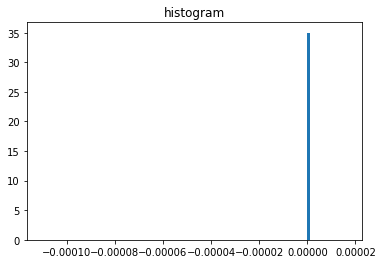

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 3,
       0, 1, 1, 0, 2, 2, 1, 3, 0, 2, 1, 0, 2, 1, 1, 3, 1, 0, 2, 2, 0, 1, 2,
       1, 2, 2, 0, 2, 1, 1, 3, 2, 3, 4, 0, 4, 2, 2, 1, 3, 1, 2, 0, 0, 1, 3,
       1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 3, 0, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0])